The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [ ]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train =  fetch_20newsgroups(subset='train', shuffle=True)

mydata_test = fetch_20newsgroups(subset='test', shuffle=True)

In [ ]:
# Print the news groups(target) in the dataset

print(mydata_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [ ]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [ ]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [ ]:
# Preprocessing the data
def clean_message(message):
    message = message.lower() #Converting the message to lowercase
    message = re.sub(r'[^\w\s]', '', message) #Removing the punctuations in the message using regex
    message = re.sub(r'https?://\S+|www\.\S+', '', message) #Removing the links in the message using regex
    message_cleaned = word_tokenize(message) #This function is to tokenize the message
    message_cleaned = [r for r in message_cleaned if r not in stopwords.words("english")] #Removing the stop words from the list of tokens
    message_cleaned = ' '.join(word for word in message_cleaned)
    return message_cleaned


lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    #tokenizing as lines
    clean_line = clean_message(line)
    lines.append(word_tokenize(clean_line))

    #tokenizing as words
    

# Make sure the word_list contains unique tokens
word_list = np.unique(np.concatenate(lines, axis=0))


# Calculate the total documents present in the corpus
total_docs = len(lines)
 
#Create a dictionary to keep track of index of each word
dict_idx = {word_list[i]: i for i in range(0, len(word_list))}


In [ ]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {word_list[i]: 0 for i in range(0, len(word_list))}
    for word in word_list:
        for line in lines:
            if word in line:
                freq_word[word] += 1
    

    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

type(freq_word)

dict

In [ ]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    tf=document.count(word)/len(document)

    return tf

In [ ]:
# Create a function to calculate the Inverse Document Frequency
import math

def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
'''
    idf = np.log((total_docs + 1)/(freq_word[word] + 1)) + 1

    return idf

In [ ]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = {}
    tf={}
    idf={}
    word_list =[]
    for line_index, line in enumerate(sentence):
        for word in line:
            if len(word) < 2:
                continue
            tf[word, line_index] = term_frequency(line, word)
            if word not in word_list:
                word_list.append(word)
    for word in word_list:
        idf[word] = inverse_df(word)
    
    for keys in tf.keys():
        tf_idf_vec[keys] = tf[keys] * idf[keys[0]]
        
    sparse_matrix = csr_matrix((len(sentence), len(word_list))).toarray()
    
    dict_idx = {word_list[i]: i for i in range(0, len(word_list))}
    
    for row, line in enumerate(sentence):
        for word, ind in zip(dict_idx.keys(), dict_idx.values()):
            sparse_matrix[row, ind] = tf_idf_vec.get((word, row), 0)
    return sparse_matrix
    

In [ ]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

X = tfidf(lines)

## Multinomial Naive Bayes (10 Points)

In [ ]:
#Fit a Multinomial Naive Bayes Model on our dataset

model = MultinomialNB()
target_y = mydata_train.target
model.fit(X, target_y)


MultinomialNB()

In [ ]:
#Perform testing on the train dataset

pred = model.predict(X)

In [ ]:
#Calculate the F1 Score and the Accuracy
F1_score = f1_score(target_y, pred, average='micro')
Accuracy = accuracy_score(target_y, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.905
Accuracy:  0.905


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
# install libraries
!pip install wikipedia

In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = []

# list of articles to be downloaded
articles = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Engineering Management" , "Library" , "Cafeteria" , "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Chase Bank" , "Visa Inc.",  "European Central Bank", "Bank", "World War" , "Student loans" , "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

# download and store articles (summaries) in this variable
data = []
for article in articles:
    data.append(wikipedia.page(article , auto_suggest=False).summary)


Before vectorizing my data, I decided to clean it up. Because of the absence of uniformity, punctuation characters, digits, and upper case letters treat a word as if it were a different one. Clustering results will be influenced by the occurrence of stop words in high frequency. It's also critical to feed your data to the model in a fashion that the model understands in order for the model to achieve maximum accuracy and efficiency.

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
warnings.filterwarnings("ignore")

def clean_message(message):
    message = message.lower() #Converting the message to lowercase
    message = re.sub(r'[^\w\s]', '', message) #Removing the punctuations in the message using regex
    message = re.sub(r'https?://\S+|www\.\S+', '', message) #Removing the links in the message using regex
    message_cleaned = word_tokenize(message) #This function is to tokenize the message
    message_cleaned = [r for r in message_cleaned if r not in stopwords.words("english")] #Removing the stop words from the list of tokens
    wn = nltk.WordNetLemmatizer()
    message_cleaned = [wn.lemmatize(x) for x in message_cleaned] #This function is to lemmatize the message
    message_cleaned = ' '.join(word for word in message_cleaned)

    return message_cleaned



### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
data_clean = []
for text in data:
    data_clean.append(clean_message(text))
tfidfv = TfidfVectorizer()
X = tfidfv.fit_transform(data_clean)


In [ ]:
print(X.shape)

(25, 1826)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(2, verbose=1)
# call TSNE() to fit the data
z = tsne.fit_transform(X) 
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = z[:,0]
df_subset['tsne-2d-two'] = z[:,1]

Plot and annotate the points with different markers for different expected groups.

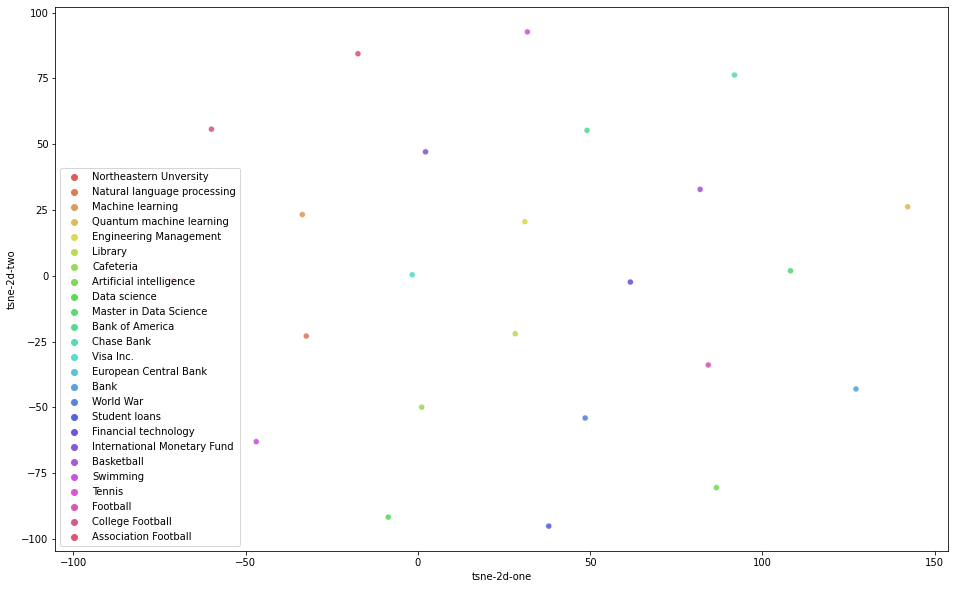

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df_subset['tsne-2d-one'], y=df_subset['tsne-2d-two'],
    hue=articles,
    palette=sns.color_palette("hls", 25),
    data=df_subset,
    legend="full",
    alpha = 0.9
)

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

The T-SNE has classified the documents based on the content of the articles scraped from Wikipedia. As we can see from the plot, it has clustered some documents correctly together closely, but some similar known documents are placed far apart. This could be because of the content in the Wikipedia articles that have made the algorithm cluster them this way. For example, Student loans, Financial Technology and Internatioal Monetary fund are clustered closer because they are all connected by the common topic of 'financial matters'.


**Answer(1-3 sentences):**  
  


# Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook for download 

### Library Imports and Utility functions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
nltk.download('punkt')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
    text = text.lower() #Converting the text to lowercase
    text = re.sub(r'[^\w\s]', '', text) #Removing the punctuations in the text using regex
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #Removing the links in the text using regex
    text_cleaned = word_tokenize(text) #This function is to tokenize the text
    text_cleaned = [r for r in text_cleaned if r not in stopwords.words("english")] #Removing the stop words from the list of tokens
    wn = nltk.WordNetLemmatizer()
    text_cleaned = [wn.lemmatize(x) for x in text_cleaned] #This function is to lemmatize the message
    text_cleaned = ' '.join(word for word in text_cleaned)

    return text_cleaned



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [ ]:
 # Import the train.txt and val.txt file into pandas dataframe format 

# train 
df_train = pd.read_csv('train.txt' , delimiter = ';', header = None)
# validation
df_val = pd.read_csv('val.txt', delimiter = ';', header = None)
# and printout the train.shape and validation.shape 
df_train.shape , df_val.shape
# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

((16000, 2), (2000, 2))

In [ ]:
# clean the text in the train and validation dataframes using the clean_text function provided above
df_train[0] = [clean_text(text) for text in df_train[0]]
df_val[0] = [clean_text(text) for text in df_val[0]]

In [ ]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer()
# fit on train dataset and transform both train and validation dataset
df_countvect_train = countvect.fit_transform(df_train[0])
df_countvect_val = countvect.transform(df_val[0])


In [ ]:
 # initialise tfidf vectorizer from sklearn module with default parameter
tfidfv = TfidfVectorizer()
# fit on train dataset and transform both train and validation dataset
df_tf_transform_train = tfidfv.fit_transform(df_train[0])
df_tf_transform_val = tfidfv.transform(df_val[0])

In [ ]:
# initialise label encoder from sklearn module
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# fit on train labels and transform both train and validation labels
df_train[1] = le.fit_transform(df_train[1])
df_val[1] = le.transform(df_val[1])

In [ ]:
# convert the labels into one hot encoding form
ohe_train_labels = pd.DataFrame()
ohe_train_labels = pd.get_dummies(df_train[1])
ohe_val_labels = pd.DataFrame()
ohe_val_labels = pd.get_dummies(df_val[1])

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics.

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):
    model = tf.keras.models.Sequential() 
    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))
    model.add(inp)

  # layer 2 : add the dense layer with 2048 units and relu activation
    layer2 = tf.keras.layers.Dense(units = 2048 , activation = 'relu')
    model.add(layer2)
  # layer 3 : add the dropout layer with dropout rate of 0.5
    layer3 = tf.keras.layers.Dropout(rate = 0.5)
    model.add(layer3)
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
    layer4 = tf.keras.layers.Dense(units = 1024 , activation = 'tanh', kernel_regularizer='l2')
    model.add(layer4)
  # layer 5 : add the dropout layer with dropout rate of 0.5
    layer5 = tf.keras.layers.Dropout(rate = 0.5)
    model.add(layer5)
  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
    layer6 = tf.keras.layers.Dense(units = 512 , activation = 'tanh', kernel_regularizer='l2')
    model.add(layer6)
  # layer 7 : add the dropout layer with dropout rate of 0.5
    layer7 = tf.keras.layers.Dropout(rate = 0.5)
    model.add(layer7)
  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
    layer8 = tf.keras.layers.Dense(units = 256 , activation = 'tanh', kernel_regularizer='l2')
    model.add(layer8)
  # layer 9 : add the dropout layer with dropout rate of 0.5
    layer9 = tf.keras.layers.Dropout(rate = 0.5)
    model.add(layer9)
  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
    layer10 = tf.keras.layers.Dense(units = 128 , activation = 'tanh', kernel_regularizer='l2')
    model.add(layer10)
  # layer 11 : add the dropout layer with dropout rate of 0.5
    layer11 = tf.keras.layers.Dropout(rate = 0.5)
    model.add(layer11)
  # layer 12 : output layer with units equal to number of classes and activation as softmax
    layer12 = tf.keras.layers.Dense(units = 6, activation = 'softmax')
    model.add(layer12)
  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='rmsprop', metrics=['AUC' , 'accuracy' , 'Precision' , 'Recall'])
    return model


In [ ]:
# call the build_model function and initialize the model
bm = build_model(df_countvect_train)

In [ ]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = bm.fit( df_countvect_train.toarray(), ohe_train_labels, epochs=10, batch_size=8 , validation_data = (df_countvect_val.toarray() , ohe_val_labels))

In [ ]:
history.history

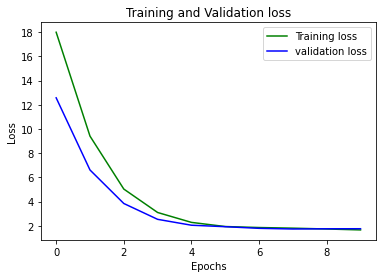

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

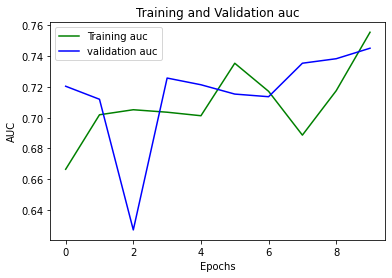

In [ ]:
auc_train = history.history['auc']
auc_val = history.history['val_auc']
epochs = range(0,10)
plt.plot(epochs, auc_train, 'g', label='Training auc')
plt.plot(epochs, auc_val, 'b', label='validation auc')
plt.title('Training and Validation auc')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

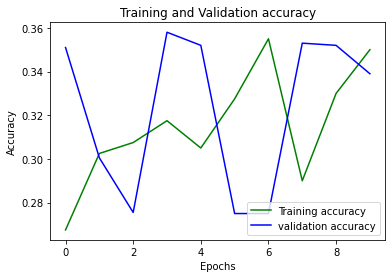

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

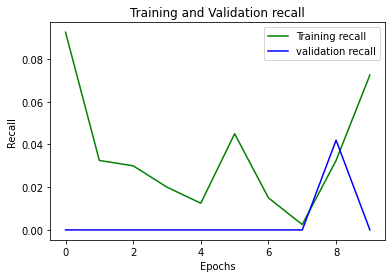

In [ ]:
recall_train = history.history['recall']
recall_val = history.history['val_recall']
epochs = range(0,10)
plt.plot(epochs, recall_train, 'g', label='Training recall')
plt.plot(epochs, recall_val, 'b', label='validation recall')
plt.title('Training and Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

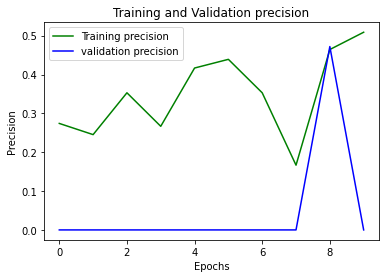

In [ ]:
precision_train = history.history['precision']
precision_val = history.history['val_precision']
epochs = range(0,10)
plt.plot(epochs, precision_train, 'g', label='Training precision')
plt.plot(epochs, precision_val, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
# again call the build_model function and initialize the model
bm2 = build_model(df_tf_transform_train)

In [ ]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = bm2.fit(df_tf_transform_train.toarray() , ohe_val_labels, batch_size = 8 , validation_data = (df_tf_transform_val , ohe_val_labels))

In [ ]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
auc_train = history.history['auc']
auc_val = history.history['val_auc']
epochs = range(0,10)
plt.plot(epochs, auc_train, 'g', label='Training auc')
plt.plot(epochs, auc_val, 'b', label='validation auc')
plt.title('Training and Validation auc')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
recall_train = history.history['recall']
recall_val = history.history['val_recall']
epochs = range(0,10)
plt.plot(epochs, recall_train, 'g', label='Training recall')
plt.plot(epochs, recall_val, 'b', label='validation recall')
plt.title('Training and Validation recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
precision_train = history.history['precision']
precision_val = history.history['val_precision']
epochs = range(0,10)
plt.plot(epochs, precision_train, 'g', label='Training precision')
plt.plot(epochs, precision_val, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

## Theory Question Follow up

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove?

**Answer:**

Count Vectorizer: Count Vectorizer generates a vector with frequency of each term in a document. This can be used in cases where you want to find nature/class of a document

TF-IDF: This is a word-document importance mapping algorithm. In this concept, the order of words has zero significance. Unlike Count Vectorizer, it generates a matrix depicting how important a word is to a document among the corpus of vocabulary and not just the frequency. TF-IDF is obtained through linear algebra and its value can be generated to words or to documents.

Word2Vec: Word2Vec algorithm gives associations between words from a corpus. It gives a vector which represents each word as a real number, indicating the level of similarity between semantics of words with the neighbouring words (local context). Unlike TF-IDF, order/placement of words in a document is given importance in Word2Vec.

GloVe: Unlike Word2Vector, GloVe is an algorithm which finds the co-occurence and semantic similarity of words with respect to entire corpus (global context) and not just neighbouring words

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF?

**Answer:**

The Bag of Words technique essentially generates a set of vectors reflecting the count of word occurrences in the text, but the TF-IDF model incorporates information on both key and minor words. Each index location in the feature vector generated by the TF-IDF vectorizer represents a word with the same integer value associated with the vocabulary. Whereas with BoW, the resultant vector contains vocabulary with indexes rising in aplhabetical order of each word's first letter.